<a href="https://colab.research.google.com/github/Khushi-216/Python/blob/main/Practical_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt


In [ ]:
IPL_Ball=pd.read_csv("IPL_Ball.csv")
IPL_Matches=pd.read_csv("IPL_Matches.csv")

In [ ]:
data=pd.merge(IPL_Ball,IPL_Matches,on="id")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                260920 non-null  int64  
 1   inning            260920 non-null  int64  
 2   batting_team      260920 non-null  object 
 3   bowling_team      260920 non-null  object 
 4   over              260920 non-null  int64  
 5   ball              260920 non-null  int64  
 6   batter            260920 non-null  object 
 7   bowler            260920 non-null  object 
 8   non_striker       260920 non-null  object 
 9   batsman_runs      260920 non-null  int64  
 10  extra_runs        260920 non-null  int64  
 11  total_runs        260920 non-null  int64  
 12  extras_type       14125 non-null   object 
 13  is_wicket         260920 non-null  int64  
 14  player_dismissed  12950 non-null   object 
 15  dismissal_kind    12950 non-null   object 
 16  fielder           93

In [ ]:
top=data.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(5)
top

,batsman_runs
batter,
V Kohli,8014
S Dhawan,6769
RG Sharma,6630
DA Warner,6567
SK Raina,5536


['V Kohli', 'S Dhawan', 'RG Sharma', 'DA Warner', 'SK Raina']
[8014, 6769, 6630, 6567, 5536]


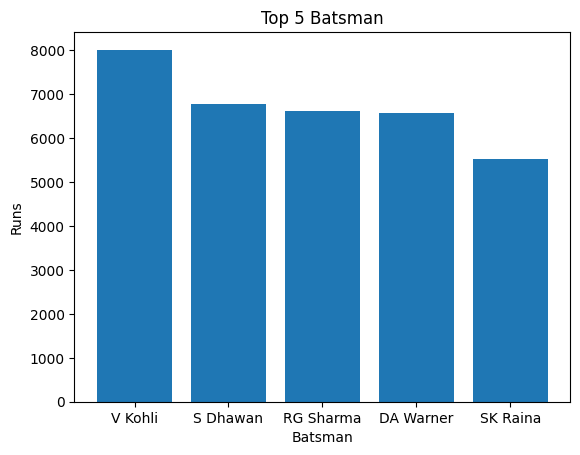

In [ ]:
x=list(top.index) #TOP 5 BATSMAN IN IPL
print(x)
y=list(top.values)
print(y)
plt.bar(x,y)
plt.xlabel("Batsman")
plt.ylabel("Runs")
plt.title("Top 5 Batsman")
plt.show()

In [ ]:
wickets=data[~data['dismissal_kind'].isin(['runout','retired hurt','obstructing the field','retired out'])] #TOP 5 BOWLERS IN IPL
wickets['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'stumped',
       'caught and bowled', 'hit wicket'], dtype=object)

In [ ]:
wickets.groupby('bowler')['is_wicket'].sum().nlargest(5)

,is_wicket
bowler,
YS Chahal,213
DJ Bravo,207
PP Chawla,201
SP Narine,200
R Ashwin,197


In [ ]:
data['date']=pd.to_datetime(data['date'],format='mixed') #ORANGE CAP WINNER OF ALL IPL SEASONS
data['season']=pd.DatetimeIndex(data['date']).year
data['season']

,season
0,2008
1,2008
2,2008
3,2008
4,2008
...,...
260915,2024
260916,2024
260917,2024
260918,2024


In [ ]:
s=data['season'].unique()
s

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023, 2024], dtype=int32)

In [ ]:
oc={}
for i in s:
  k=data[data['season']==i].groupby('batter')['batsman_runs'].sum().nlargest(1)
  oc[i]=[k.index[0],k.values[0]]
oc

{2008: ['SE Marsh', 616],
 2009: ['ML Hayden', 572],
 2010: ['SR Tendulkar', 618],
 2011: ['CH Gayle', 608],
 2012: ['CH Gayle', 733],
 2013: ['MEK Hussey', 733],
 2014: ['RV Uthappa', 660],
 2015: ['DA Warner', 562],
 2016: ['V Kohli', 973],
 2017: ['DA Warner', 641],
 2018: ['KS Williamson', 735],
 2019: ['DA Warner', 692],
 2020: ['KL Rahul', 676],
 2021: ['RD Gaikwad', 635],
 2022: ['JC Buttler', 863],
 2023: ['Shubman Gill', 890],
 2024: ['V Kohli', 741]}

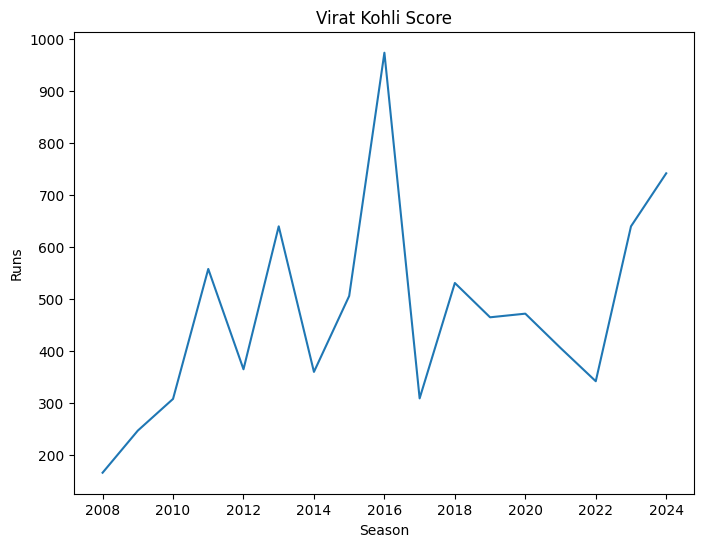

In [ ]:
vk=data[data['batter']=='V Kohli'].groupby('season')['batsman_runs'].sum() #VIRAT KOHLI SCORES IN  EACH SEASON
x=list(vk.index)
y=list(vk.values)
plt.figure(figsize=(8,6))
plt.plot(x,y)
plt.xlabel("Season")
plt.ylabel("Runs")
plt.title("Virat Kohli Score")
plt.show()

In [ ]:
#HOW MANY DOT BALLS- ONES - TWOS - THREES - FOURS & SIXES`
# PLayer and their number of centuries scored
